**Autoencoder on Galaxy-10 dataset:**

Reconstruction loss of <1e-3 with a latent space of 8x8x8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, UpSampling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
images=np.load('/content/drive/MyDrive/images.npy')
print(images.shape)

(21785, 69, 69, 3)


In [ ]:
def display(images):
  l=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
  for i in range(9):
    ax=plt.subplot(3, 3, i+1)
    plt.imshow(images[l[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

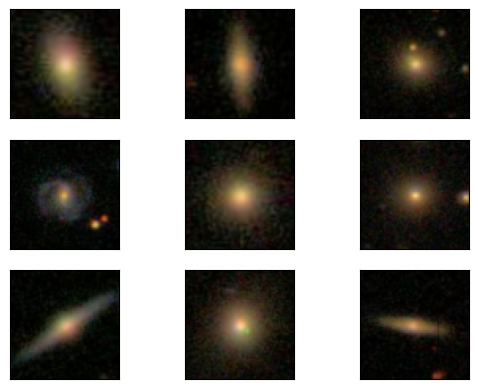

In [ ]:
display(images)

In [ ]:
import cv2
grayscale_dataset = np.empty((images.shape[0], images.shape[1], images.shape[2]), dtype=np.uint8)
for i in range(images.shape[0]):
    rgb_image = images[i]
    gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
    grayscale_dataset[i] = gray_image
print(grayscale_dataset.shape)

(21785, 69, 69)


(21785, 69, 69, 1)
(21785, 64, 64, 1)


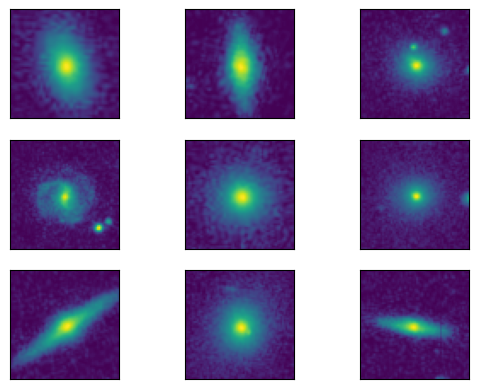

In [ ]:
images=grayscale_dataset.reshape(grayscale_dataset.shape[0], 69, 69, 1)
print(images.shape)
images=images[:, 2:66, 2:66, :]
print(images.shape)
display(images)

In [ ]:
images=images.astype('float32')
images /= 255
X_train, X_test = train_test_split(images, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(17428, 64, 64, 1)
(4357, 64, 64, 1)


In [ ]:
model = Sequential()

#encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D (16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D (8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#decoder
model.add(Conv2D(8, (3, 3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation= 'relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(1, (3, 3), activation= 'sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 8, 8, 8)          

In [ ]:
model.fit(X_train, X_train, epochs=20, shuffle=True)

Epoch 1/20
545/545 [==============================] - 6s 7ms/step - loss: 0.0284 - accuracy: 0.0050
Epoch 2/20
545/545 [==============================] - 4s 8ms/step - loss: 0.0251 - accuracy: 0.0050
Epoch 3/20
545/545 [==============================] - 4s 8ms/step - loss: 0.0251 - accuracy: 0.0050
Epoch 4/20
545/545 [==============================] - 4s 7ms/step - loss: 0.0251 - accuracy: 0.0050
Epoch 5/20
545/545 [==============================] - 4s 7ms/step - loss: 0.0250 - accuracy: 0.0050
Epoch 6/20
545/545 [==============================] - 4s 8ms/step - loss: 0.0253 - accuracy: 0.0050
Epoch 7/20
545/545 [==============================] - 4s 7ms/step - loss: 0.0073 - accuracy: 0.0050
Epoch 8/20
545/545 [==============================] - 4s 7ms/step - loss: 7.2575e-04 - accuracy: 0.0050
Epoch 9/20
545/545 [==============================] - 4s 7ms/step - loss: 5.5024e-04 - accuracy: 0.0050
Epoch 10/20
545/545 [==============================] - 5s 8ms/step - loss: 4.8327e-04 - accu

In [ ]:
pred=model.predict(X_test)

137/137 [==============================] - 0s 3ms/step


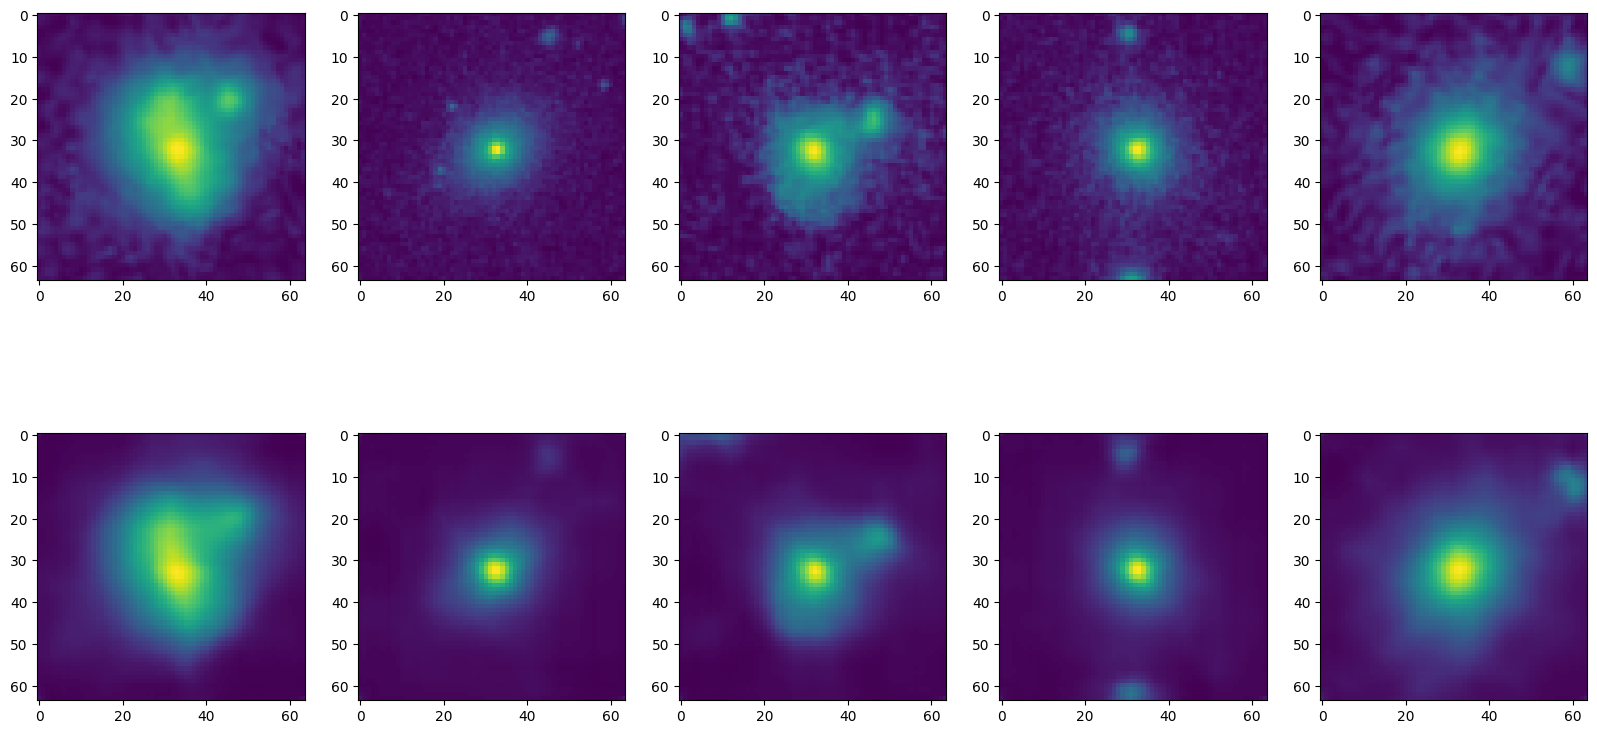

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i in range(5):
  # original image
  ax=plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i])
  # decoded image
  ax=plt.subplot(2, 5, i+1+5)
  plt.imshow(pred[i])

plt.show()